In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
df = pd.read_csv("Cleavland.csv")
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


     
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [34]:
df.isnull().sum().sum()

np.int64(0)

In [35]:

(df.values == '?').sum()

np.int64(6)

In [36]:
df = df.replace('?', np.nan)
df = df.dropna()

In [37]:
df.shape

(296, 14)

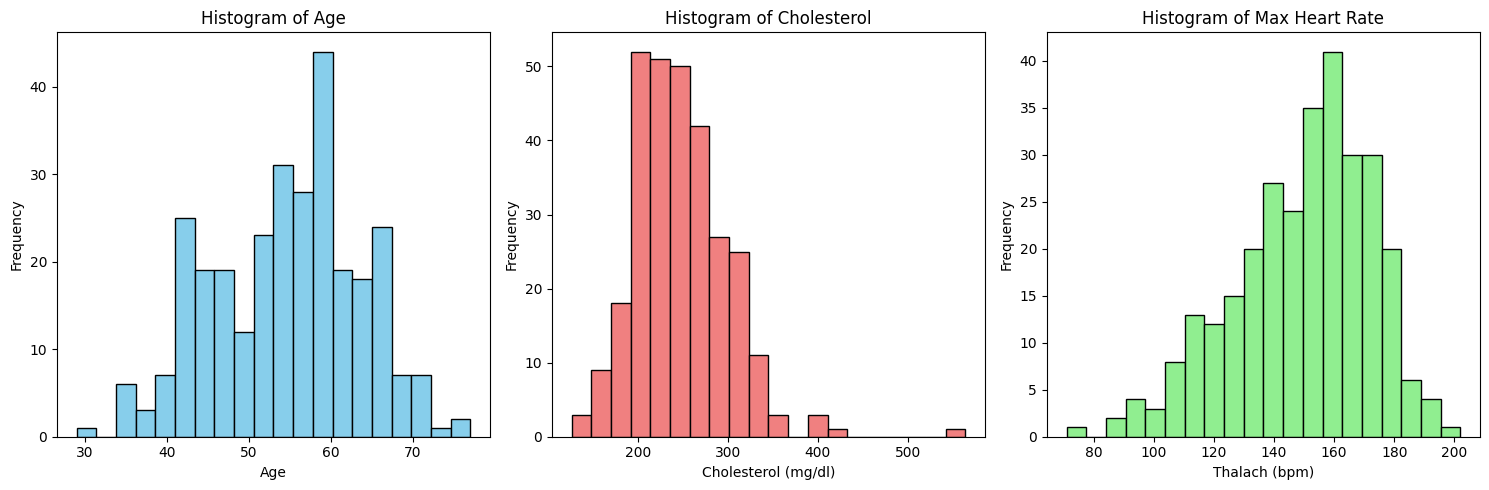

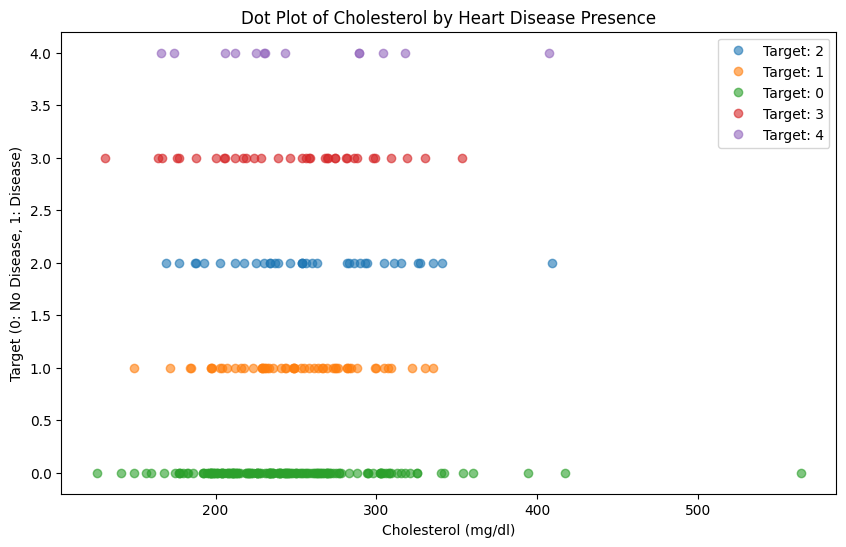

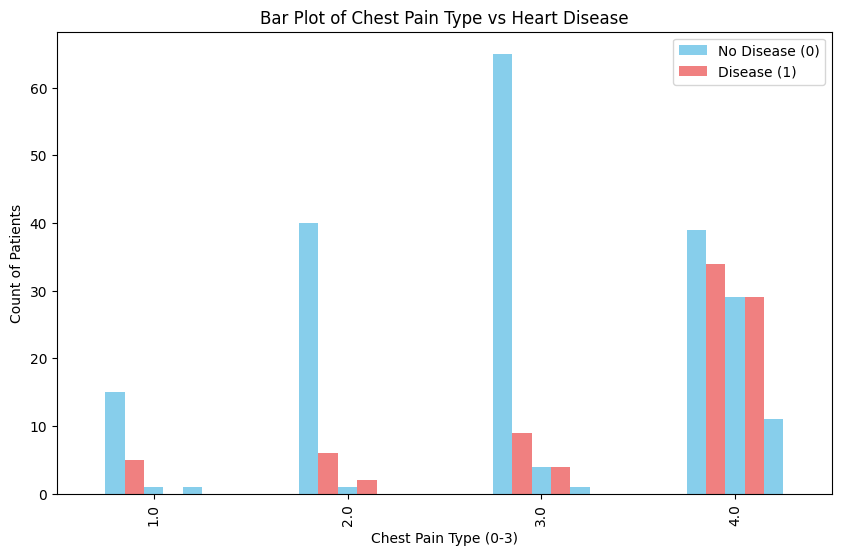

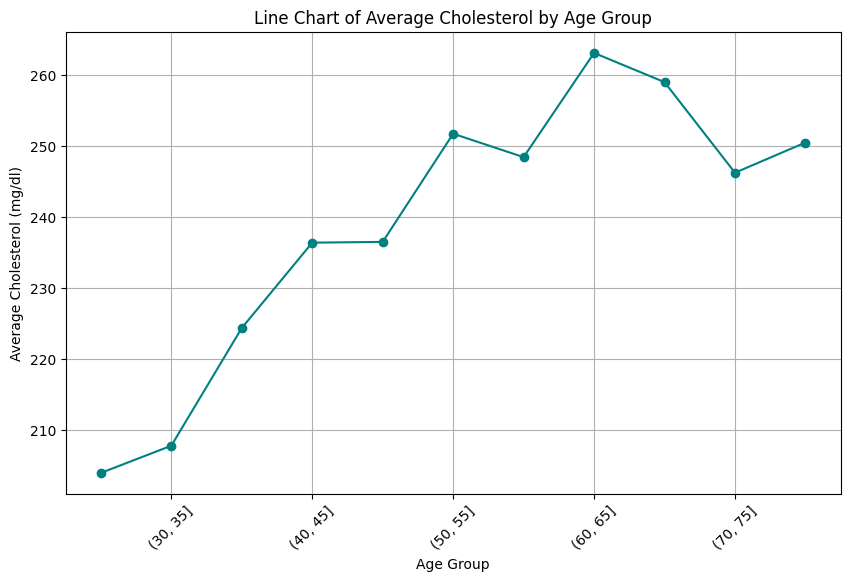

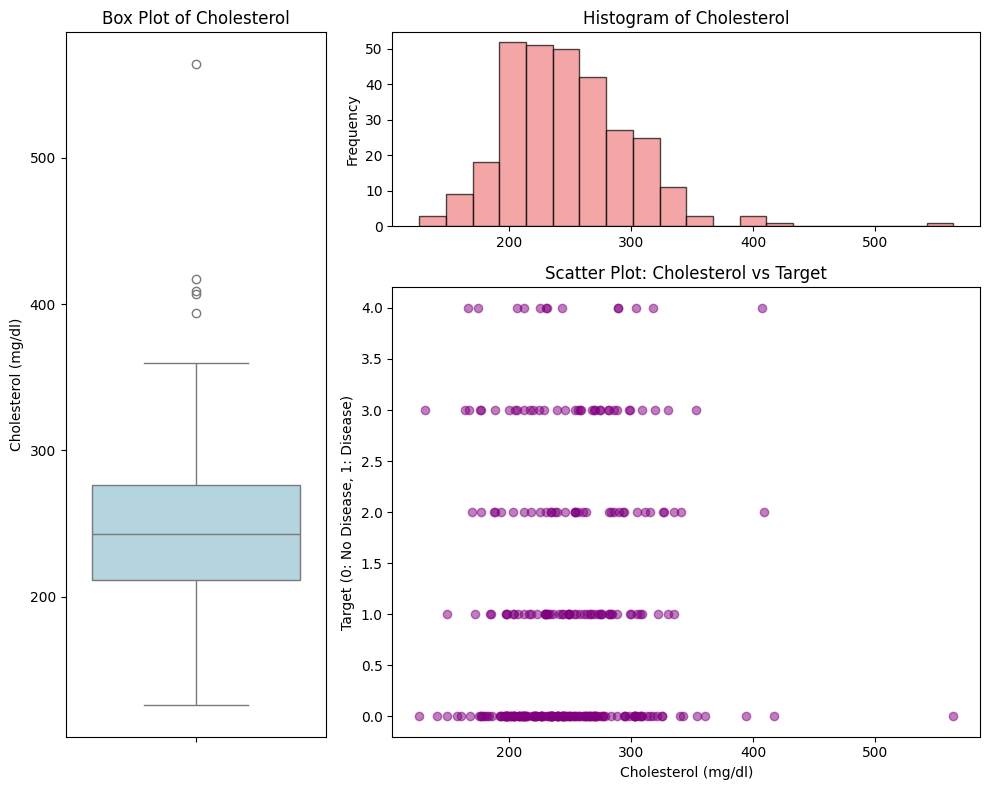

In [38]:
# a. Histograms
# Objective: To show the distribution of continuous variables like age, cholesterol, and thalach
# Columns we want to ensure are numeric
columns_to_convert = ['age', 'chol', 'thalach', 'target', 'cp']

# Convert columns to numeric, coerce errors to NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN in any of the selected columns
df.dropna(subset=columns_to_convert, inplace=True)


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['chol'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Cholesterol')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['thalach'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Max Heart Rate')
plt.xlabel('Thalach (bpm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# b. Dot Plots
# Objective: To show individual data points for cholesterol levels by target (heart disease presence)
plt.figure(figsize=(10, 6))
for target_val in df['target'].unique():
    subset = df[df['target'] == target_val]
    plt.plot(subset['chol'], [target_val] * len(subset), 'o',
             label=f'Target: {target_val}', alpha=0.6)
plt.title('Dot Plot of Cholesterol by Heart Disease Presence')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Target (0: No Disease, 1: Disease)')
plt.legend()
plt.show()

# c. Bar Plots
# Objective: To show the count of patients by chest pain type (cp) and their heart disease status
cp_counts = df.groupby(['cp', 'target']).size().unstack()
cp_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Bar Plot of Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count of Patients')
plt.legend(['No Disease (0)', 'Disease (1)'])
plt.show()

# d. Line Charts
# Objective: To show the trend of average cholesterol levels across age groups
age_bins = pd.cut(df['age'], bins=range(20, 90, 5))
avg_chol_by_age = df.groupby(age_bins, observed=False)['chol'].mean()

plt.figure(figsize=(10, 6))
avg_chol_by_age.plot(kind='line', marker='o', color='teal')
plt.title('Line Chart of Average Cholesterol by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol (mg/dl)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Plotting all in one figure
plt.figure(figsize=(10, 8))

# --- Boxplot on the left side
ax1 = plt.subplot2grid((3, 3), (0, 0), rowspan=3)
sns.boxplot(y=df['chol'], color='lightblue', ax=ax1)
ax1.set_title('Box Plot of Cholesterol')
ax1.set_ylabel('Cholesterol (mg/dl)')

# --- Histogram on the top
ax2 = plt.subplot2grid((3, 3), (0, 1), colspan=2)
ax2.hist(df['chol'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.set_title('Histogram of Cholesterol')
ax2.set_ylabel('Frequency')

# --- Scatter Plot at the bottom
ax3 = plt.subplot2grid((3, 3), (1, 1), rowspan=2, colspan=2)
ax3.scatter(df['chol'], df['target'], alpha=0.5, color='purple')
ax3.set_title('Scatter Plot: Cholesterol vs Target')
ax3.set_xlabel('Cholesterol (mg/dl)')
ax3.set_ylabel('Target (0: No Disease, 1: Disease)')

plt.tight_layout()
plt.show()